In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, LabelBinarizer, OneHotEncoder

In [3]:
y = np.array(['Chien', 'Chat', 'Chat', 'Oiseau'])

In [4]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([1, 0, 0, 2])

In [5]:
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['Chat', 'Chat', 'Oiseau', 'Oiseau'], dtype='<U6')

In [6]:
X = np.array([
    ['Chat', 'Poils'],
    ['Chien', 'Poils'],
    ['Chat', 'Poils'],
    ['Oiseau', 'Plumes'],
])

In [7]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [8]:
y = np.array(['Chien', 'Chat', 'Chat', 'Oiseau'])

In [9]:
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 3)>

In [10]:
X = np.array([
    ['Chat', 'Poils'],
    ['Chien', 'Poils'],
    ['Chat', 'Poils'],
    ['Oiseau', 'Plumes'],
])

In [52]:
encoder = OneHotEncoder()
encoder.fit_transform(X)
encoder

OneHotEncoder()

## Normaliser

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
X = np.array([[70], [80], [120]])

In [16]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [17]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

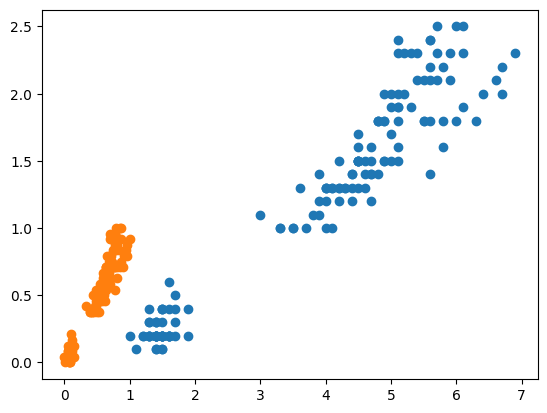

In [23]:
X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_minmax[:, 2], X_minmax[:, 3])

In [27]:
from sklearn.preprocessing import StandardScaler, RobustScaler

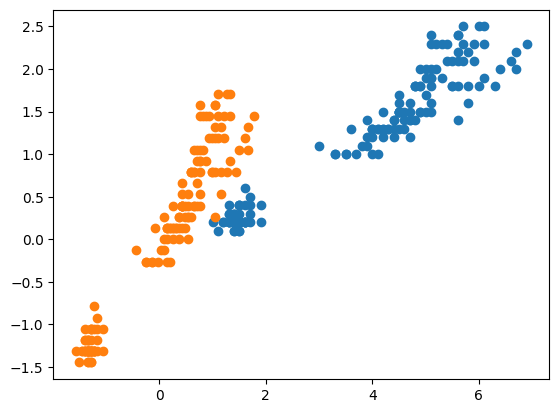

In [26]:

X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3])
     


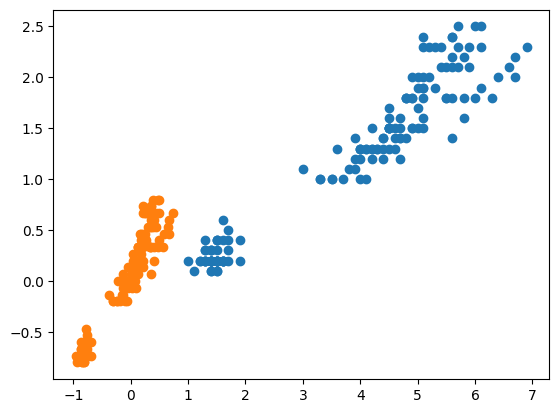

In [28]:
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3])
plt.scatter(X_robust[:, 2], X_robust[:, 3])

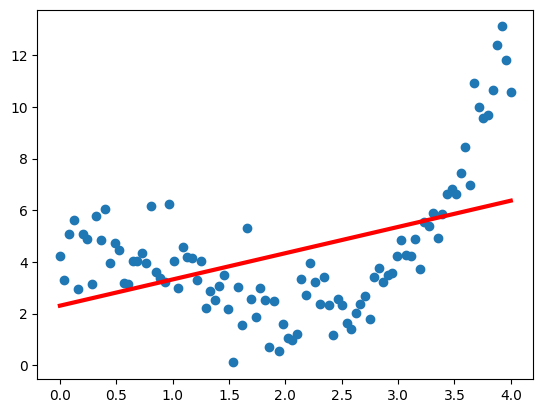

In [29]:


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
     

m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)
     


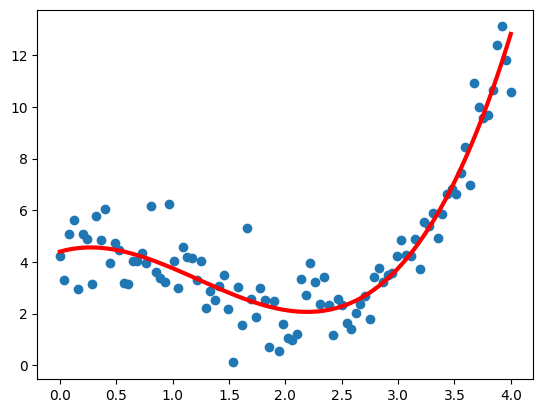

In [30]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

Après l'utilisation Polynomial features, ne surtout pas oublier de les normaliser

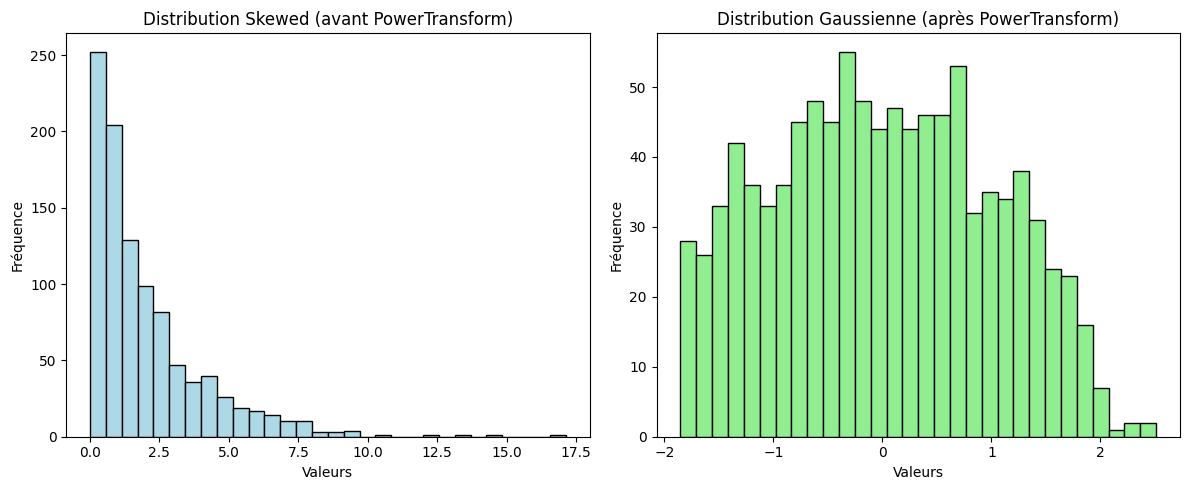

In [32]:
from sklearn.preprocessing import PowerTransformer

# 1. Générer des données biaisées
np.random.seed(0)
data_skewed = np.random.exponential(scale=2, size=1000)

# 2. Appliquer PowerTransformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(data_skewed.reshape(-1, 1))

# 3. Tracer
plt.figure(figsize=(12, 5))

# Avant transformation
plt.subplot(1, 2, 1)
plt.hist(data_skewed, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution Skewed (avant PowerTransform)')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

# Après transformation
plt.subplot(1, 2, 2)
plt.hist(data_transformed, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution Gaussienne (après PowerTransform)')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


In [33]:
from sklearn.preprocessing import Binarizer, KBinsDiscretizer

In [35]:
X = np.linspace(0, 5, 10).reshape((10, 1))
np.hstack((X, Binarizer(threshold=3).fit_transform(X)))

array([[0.        , 0.        ],
       [0.55555556, 0.        ],
       [1.11111111, 0.        ],
       [1.66666667, 0.        ],
       [2.22222222, 0.        ],
       [2.77777778, 0.        ],
       [3.33333333, 1.        ],
       [3.88888889, 1.        ],
       [4.44444444, 1.        ],
       [5.        , 1.        ]])

In [36]:
KBinsDiscretizer(n_bins=6).fit_transform(X).toarray()

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [38]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9736842105263158

Dans le cas de transformer d'encodage et de standardisation :

In [43]:
from sklearn.compose import ColumnTransformer

# Disons que tu as ça :
cols_num = ['age', 'salaire']
cols_cat = ['sexe', 'ville']

# Transformer pour chaque type de colonne
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), cols_num),
    ('cat', OneHotEncoder(), cols_cat)
])

# Pipeline complet
model = make_pipeline(preprocessor, SGDClassifier())

# Ensuite tu fais simplement :
model.fit(X_train, y_train)


exemple


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [46]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

Préprocessing vs sans préprocessing

In [47]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8421052631578947

In [48]:
grid.score(X_test, y_test)

0.9736842105263158